In [1]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_lg")
import statistics
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import collections
from collections import Counter
import re
import language_tool_python  
from nltk.tokenize import sent_tokenize
import textstat
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import math
from nltk.sentiment import SentimentIntensityAnalyzer
import language_tool_python

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
def generate_ngrams(s, n):
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    list1=[" ".join(ngram) for ngram in ngrams]
    #return [" ".join(ngram) for ngram in ngrams]
    return list1

def rep_count(str1):
    list1=generate_ngrams(str1, 5)
    sentence_counter = Counter(list1)
    #print(sentence_counter)
    total_freq=0
    total_rep=0
    for sentence, frequency in sentence_counter.items():
        if frequency > 1:
            total_freq+=frequency
            total_rep+=1
            #print(f"Sentence: '{sentence}' - Frequency: {frequency}")
    #print("number of sentences appeared more than once ",total_rep," and total number of frequency(that are>1) ",total_freq)
    return total_freq,total_rep, sentence_counter.most_common(1)[0][1]

In [4]:
df1 = pd.read_csv('../csv/gpt/csv_gpt3-2.csv')
df2 = pd.read_csv('../csv/human/csv_human-2.csv')

In [5]:
ess1=df1.loc[:,'essay']
ess2=df2.loc[:,'essay']

In [13]:
t_frq1=[]
t_rep1=[]
max1=[]
t_frq2=[]
t_rep2=[]
max2=[]
for i in range(len(ess1)):
    #print("################################ for essay number ",i," ###############################################")
    tf1,tr1,max_rep1=rep_count(ess1[i])
    t_frq1.append(tf1)
    t_rep1.append(tr1)
    max1.append(max_rep1)
    tf2,tr2,max_rep2=rep_count(ess2[i])
    t_frq2.append(tf2)
    t_rep2.append(tr2)
    max2.append(max_rep2)

In [12]:
tf1

0

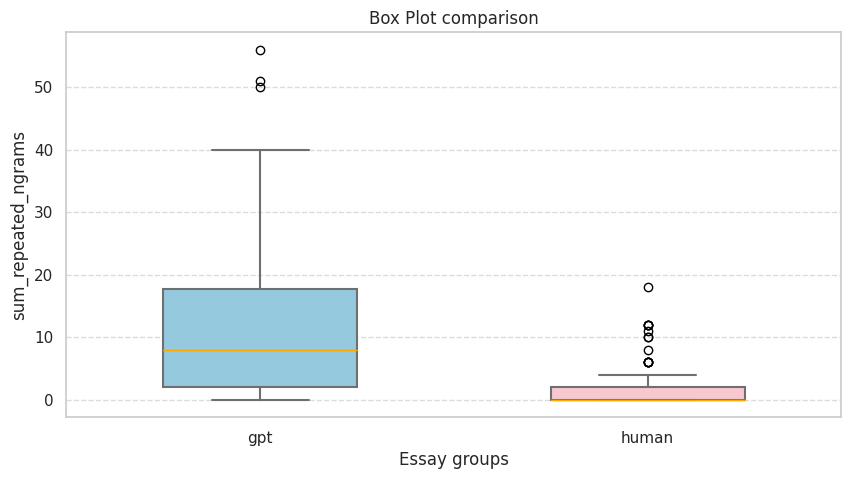

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


# Combine the data into a single DataFrame (optional but can be helpful for labeling)
import pandas as pd

data1 = pd.DataFrame({'gpt': t_frq1, 'human': t_frq2})

# Create the box plot with custom colors
colors = ["skyblue", "pink"]
medianprops = {'color': 'orange', 'linewidth': 1}
flierprops = {'marker': 'o', 'markerfacecolor': 'none', 'markeredgecolor': 'black', 'markersize': 6}

plt.subplots(figsize=(10,5))
sns.set(style="whitegrid")
sns.boxplot(data=data1, palette=colors, width=0.5, medianprops=medianprops, flierprops=flierprops)

plt.xlabel("Essay groups")
plt.ylabel("sum_repeated_ngrams")
plt.title("Box Plot comparison")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Customize the background color
#ax = plt.gca()
#ax.set_facecolor("#f0f0f0")
plt.show()

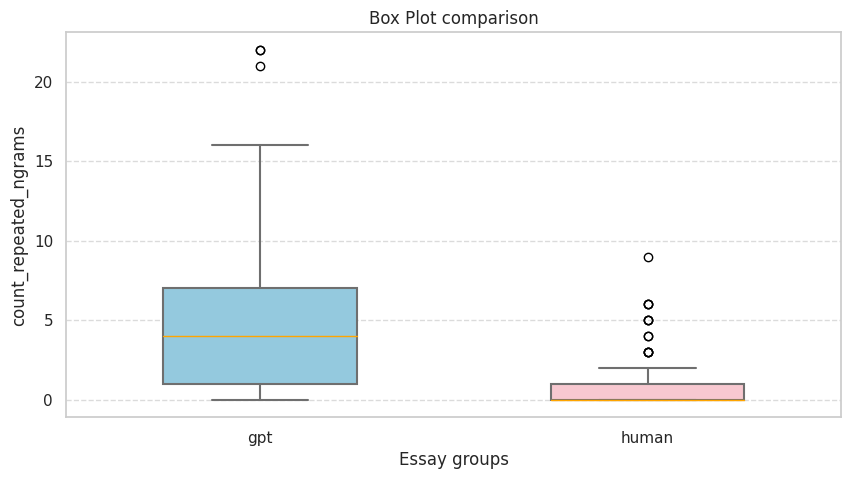

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


# Combine the data into a single DataFrame (optional but can be helpful for labeling)
import pandas as pd

data1 = pd.DataFrame({'gpt': t_rep1, 'human': t_rep2})

# Create the box plot with custom colors
colors = ["skyblue", "pink"]
medianprops = {'color': 'orange', 'linewidth': 1}
flierprops = {'marker': 'o', 'markerfacecolor': 'none', 'markeredgecolor': 'black', 'markersize': 6}

plt.subplots(figsize=(10,5))
sns.set(style="whitegrid")
sns.boxplot(data=data1, palette=colors, width=0.5, medianprops=medianprops, flierprops=flierprops)

plt.xlabel("Essay groups")
plt.ylabel("count_repeated_ngrams")
plt.title("Box Plot comparison")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Customize the background color
#ax = plt.gca()
#ax.set_facecolor("#f0f0f0")
plt.show()

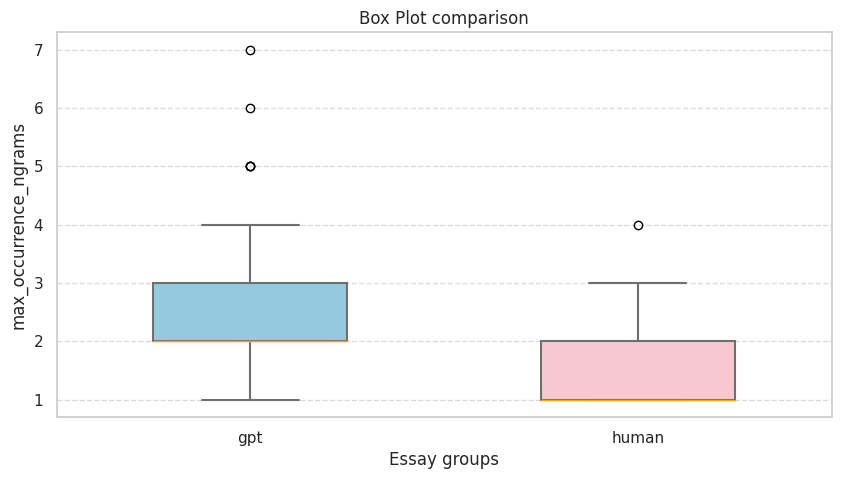

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


# Combine the data into a single DataFrame (optional but can be helpful for labeling)
import pandas as pd

data1 = pd.DataFrame({'gpt': max1, 'human': max2})

# Create the box plot with custom colors
colors = ["skyblue", "pink"]
medianprops = {'color': 'orange', 'linewidth': 1}
flierprops = {'marker': 'o', 'markerfacecolor': 'none', 'markeredgecolor': 'black', 'markersize': 6}

plt.subplots(figsize=(10,5))
sns.set(style="whitegrid")
sns.boxplot(data=data1, palette=colors, width=0.5, medianprops=medianprops, flierprops=flierprops)

plt.xlabel("Essay groups")
plt.ylabel("max_occurrence_ngrams")
plt.title("Box Plot comparison")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Customize the background color
#ax = plt.gca()
#ax.set_facecolor("#f0f0f0")
plt.show()